In [1]:
# Altitude vs Transmission time MONTY
# Created: 10/12/2022
# Author: Cameron King
# Function Authors: Henri Wessels, Alec Church

# Description:
#
# This is the script that runs a monte-carlo simulation on the model set up in the main script
# It will vary altitude to determine optimal transmission time as a function of altitude


# libraries
import math
import numpy
import mpmath
import matplotlib.pyplot as plt
import time

# functions
from ipynb.fs.full.efficiency_funcs import *

IOStream.flush timed out


[[1773.354      1934.568      2095.782      2256.996      2418.21
  2579.19475862]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [1773.354      1934.568      2095.782      2256.996      2418.21
  2579.424     ]
 [17

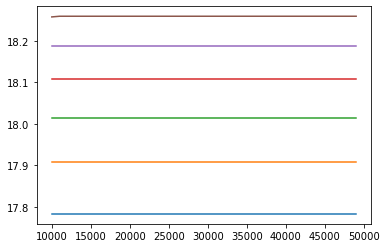

In [2]:
# OPTIMAL TRANSMISSION TIME
# this section varies altitude to determine optimal transmission time for each altitude

startTime = time.time()

# Constants
mu_m = 4.905E12; # Gravitational parameter of the moon, 
r_m = 1737500; # radius of the moon, m

# Variables
P_C = 100000; # Value determined by Henri's power_collection_func
t_step = 1; # size of time step, s
r = 5; # m, radius of the reciever

# errors
pos_err = [0,0,0];
point_err = [0,0];

# start the looping through h and t
h_min = 10000
h_max = 50000
t_end_min = 20
t_end_max = 18

h_range = range(h_min,h_max,1000);
t_end_range = numpy.arange(t_end_min,t_end_max,t_step);

# preallocation

P_R_tot = numpy.zeros((len(h_range),len(t_end_range)))
ave_eff = numpy.zeros((len(h_range),len(t_end_range)))

for j in range(0,len(h_range)):
    
    for k in range(0,len(t_end_range)):
              
        h = h_range[j];
        t_end = t_end_range[k];

        # time step accuracy
        N = t_end/t_step; # number of elements in every model array ALWAYS USE THIS FOR LOOPS
        N = int(N)
        
        # Calculations
        def FOV_func(x,r,h): # determines the angular field of view of receiver, as func of x, r, and h
            FOV = 2*(numpy.arctan((x+r)/h)-numpy.arctan(x/h))
            return FOV

        V = math.sqrt(mu_m/(r_m+h)); # orbital velocity
        x_max = V*t_end/2; # Maximum transmission ground distance, x(t=0) at start of transmission
        FOV_min = FOV_func(x_max,r,h); # smallest field of view, at maximum distance

        # ideal beam radius: the average radius of receiver over transmission period
        r_min = math.sqrt(x_max**2+h**2)*numpy.tan(FOV_min/2); # minimum radius based on FOV
        r_b = (r + r_min)/2; # average visual radius, ideal beam radius at surface

        # average transmission distance
        d_max = numpy.sqrt(x_max**2+h**2);
        d_ave = (d_max + h)/2;

        ######################################
        # Loop through current k transmission time and current j altitude
        # Save power received/efficiency for each of these
        
        t = numpy.zeros(N);
        x = numpy.zeros(N);
        d = numpy.zeros(N);
        theta = numpy.zeros(N);
        n_rec = numpy.zeros(N);
        n_pos = numpy.zeros(N);
        P_R = numpy.zeros(N);
        tot_eff = numpy.zeros(N);
        
        F_disp = [[0,1,2,3,4,5],[30000000,70,20,7,2,1]]; # placeholder
                    
        P_T = [];
                     
        for i in range(0,N-1):
            t[i] = i*t_step;
            x[i] = V*t[i] - x_max;
            theta[i] = mpmath.atan(x[i]/h);
        
            # For d = d_max -> h -> d_max, N elements
            d[i] = math.sqrt(x[i]**2 + h**2)
    
            F_disp = numpy.dstack(( F_disp, [[0,1,2,3,4,5],[30000000,70,20,7,2,1]] )) # = power_transmission_func(r_b,d_ave,d)
    
            P_T.append(F_disp[1,0,i]) # keep track of total power over time
                    
            n_rec[i] = receiver_eff_func(theta[i], P_T[i]);
        
            n_pos[i] = position_eff_func(theta[i], pos_err, point_err, F_disp[:,:,i], h, r);
        
            P_R[i] = t_step*P_T[i]*n_rec[i]*n_pos[i]
            tot_eff[i] = n_rec[i]*n_pos[i]
        
        # Power received and efficiency for each j & k
        P_R_sum = sum(P_R); # This is in Joules ->
        P_R_tot[j,k] = P_R_sum*2.77*10**-7 # kWh
        
        ave_eff[j,k] = numpy.mean(tot_eff)
        
        #print(P_R_tot[j,k])
        #print(ave_eff[j,k])

print(P_R_tot)
print(ave_eff)

elapsedTime = time.time() - startTime
print('time to run monty:',elapsedTime)

####### Plotting #######

for i in range(0,len(ave_eff[0,:])):
    plt.plot(h_range, ave_eff[:,i])





